<a href="https://colab.research.google.com/github/Tejal-20/Supply_Chain_Analysis_Using_Python/blob/main/Supply_chain_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

uploaded = files.upload()

Saving supply_chain_data.csv to supply_chain_data (1).csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv("supply_chain_data.csv")

In [6]:
data.head(5)

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
0,haircare,SKU0,69.808006,55,802,8661.996792,Non-binary,58,7,96,...,Mumbai,29,215,29,46.279879,Pending,0.226410,Road,Route B,187.752075
1,skincare,SKU1,14.843523,95,736,7460.900065,Female,53,30,37,...,Mumbai,23,517,30,33.616769,Pending,4.854068,Road,Route B,503.065579
2,haircare,SKU2,11.319683,34,8,9577.749626,Unknown,1,10,88,...,Mumbai,12,971,27,30.688019,Pending,4.580593,Air,Route C,141.920282
3,skincare,SKU3,61.163343,68,83,7766.836426,Non-binary,23,13,59,...,Kolkata,24,937,18,35.624741,Fail,4.746649,Rail,Route A,254.776159
4,skincare,SKU4,4.805496,26,871,2686.505152,Non-binary,5,3,56,...,Delhi,5,414,3,92.065161,Fail,3.145580,Air,Route A,923.440632


In [7]:
data.tail()

,Product type,SKU,Price,Availability,Number of products sold,Revenue generated,Customer demographics,Stock levels,Lead times,Order quantities,...,Location,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Inspection results,Defect rates,Transportation modes,Routes,Costs
95,haircare,SKU95,77.903927,65,672,7386.363944,Unknown,15,14,26,...,Mumbai,18,450,26,58.890686,Pending,1.210882,Air,Route A,778.864241
96,cosmetics,SKU96,24.423131,29,324,7698.424766,Non-binary,67,2,32,...,Mumbai,28,648,28,17.803756,Pending,3.872048,Road,Route A,188.742141
97,haircare,SKU97,3.526111,56,62,4370.916580,Male,46,19,4,...,Mumbai,10,535,13,65.765156,Fail,3.376238,Road,Route A,540.132423
98,skincare,SKU98,19.754605,43,913,8525.952560,Female,53,1,27,...,Chennai,28,581,9,5.604691,Pending,2.908122,Rail,Route A,882.198864
99,haircare,SKU99,68.517833,17,627,9185.185829,Unknown,55,8,59,...,Chennai,29,921,2,38.072899,Fail,0.346027,Rail,Route B,210.743009


Data Preparation and cleaning

In [8]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [9]:
data.shape

(100, 24)

In [10]:
data.describe()

,Price,Availability,Number of products sold,Revenue generated,Stock levels,Lead times,Order quantities,Shipping times,Shipping costs,Lead time,Production volumes,Manufacturing lead time,Manufacturing costs,Defect rates,Costs
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000
mean,49.462461,48.400000,460.990000,5776.048187,47.770000,15.960000,49.220000,5.750000,5.548149,17.080000,567.840000,14.77000,47.266693,2.277158,529.245782
std,31.168193,30.743317,303.780074,2732.841744,31.369372,8.785801,26.784429,2.724283,2.651376,8.846251,263.046861,8.91243,28.982841,1.461366,258.301696
min,1.699976,1.000000,8.000000,1061.618523,0.000000,1.000000,1.000000,1.000000,1.013487,1.000000,104.000000,1.00000,1.085069,0.018608,103.916248
25%,19.597823,22.750000,184.250000,2812.847151,16.750000,8.000000,26.000000,3.750000,3.540248,10.000000,352.000000,7.00000,22.983299,1.009650,318.778455
50%,51.239831,43.500000,392.500000,6006.352023,47.500000,17.000000,52.000000,6.000000,5.320534,18.000000,568.500000,14.00000,45.905622,2.141863,520.430444
75%,77.198228,75.000000,704.250000,8253.976921,73.000000,24.000000,71.250000,8.000000,7.601695,25.000000,797.000000,23.00000,68.621026,3.563995,763.078231
max,99.171329,100.000000,996.000000,9866.465458,100.000000,30.000000,96.000000,10.000000,9.929816,30.000000,985.000000,30.00000,99.466109,4.939255,997.413450


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Product type             100 non-null    object 
 1   SKU                      100 non-null    object 
 2   Price                    100 non-null    float64
 3   Availability             100 non-null    int64  
 4   Number of products sold  100 non-null    int64  
 5   Revenue generated        100 non-null    float64
 6   Customer demographics    100 non-null    object 
 7   Stock levels             100 non-null    int64  
 8   Lead times               100 non-null    int64  
 9   Order quantities         100 non-null    int64  
 10  Shipping times           100 non-null    int64  
 11  Shipping carriers        100 non-null    object 
 12  Shipping costs           100 non-null    float64
 13  Supplier name            100 non-null    object 
 14  Location                 10

Checking Missing and Duplicate values

In [12]:
data.isnull().sum()

,0
Product type,0
SKU,0
Price,0
Availability,0
Number of products sold,0
Revenue generated,0
Customer demographics,0
Stock levels,0
Lead times,0
Order quantities,0


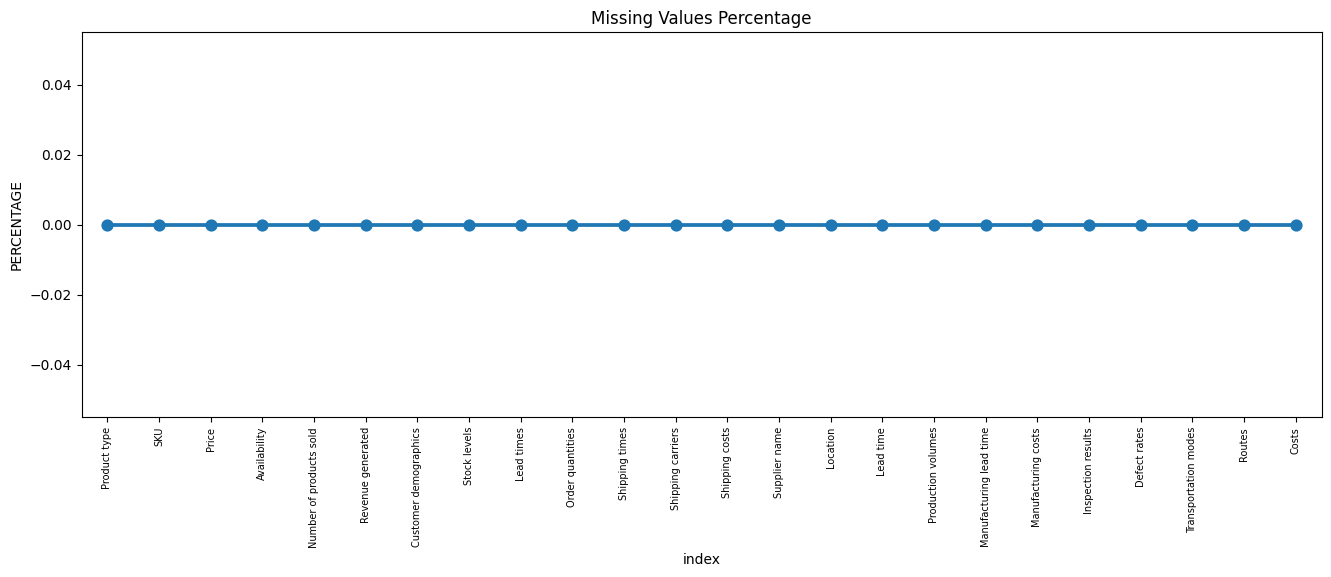

In [13]:
plt.figure(figsize = (16,5))
missing_values = pd.DataFrame(data.isnull().sum()*100/data.shape[0]).reset_index()
ax = sns.pointplot(x = 'index', y = 0, data = missing_values)
plt.xticks(rotation =90,fontsize =7)
plt.title('Missing Values Percentage')
plt.ylabel("PERCENTAGE")
plt.show()

In [14]:
#Checking Duplicate Values
len(data[data.duplicated()])

0

In [15]:
#unique values for each column
data.nunique()

,0
Product type,3
SKU,100
Price,100
Availability,63
Number of products sold,96
Revenue generated,100
Customer demographics,4
Stock levels,65
Lead times,29
Order quantities,61


Data Visualisation

**--> Sales Analysis**

In [16]:
product_sold = data.groupby(['Product type'])[['Number of products sold', 'Revenue generated']].sum().reset_index()
data['Revenue generated'] = data['Revenue generated'].round(2)

In [17]:
product_sold

,Product type,Number of products sold,Revenue generated
0,cosmetics,11757,161521.265999
1,haircare,13611,174455.390605
2,skincare,20731,241628.162133


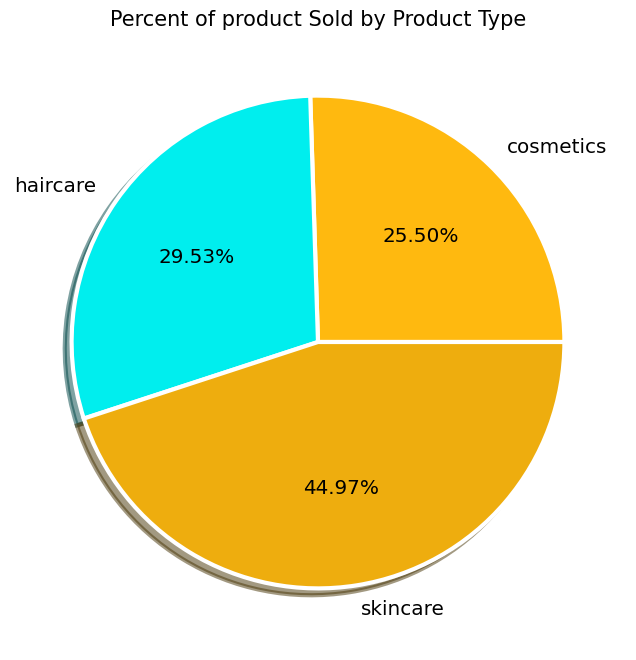

In [18]:
plt.figure(figsize = (12,8))
colors = ['#FFB90F', '#00EEEE', '#EEAD0E']
pie_chart = plt.pie(product_sold['Number of products sold'], labels = product_sold['Product type'], autopct = '%.2f%%',wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, shadow =True, colors = colors)
plt.title('Percent of product Sold by Product Type', fontsize= 15)
plt.show()

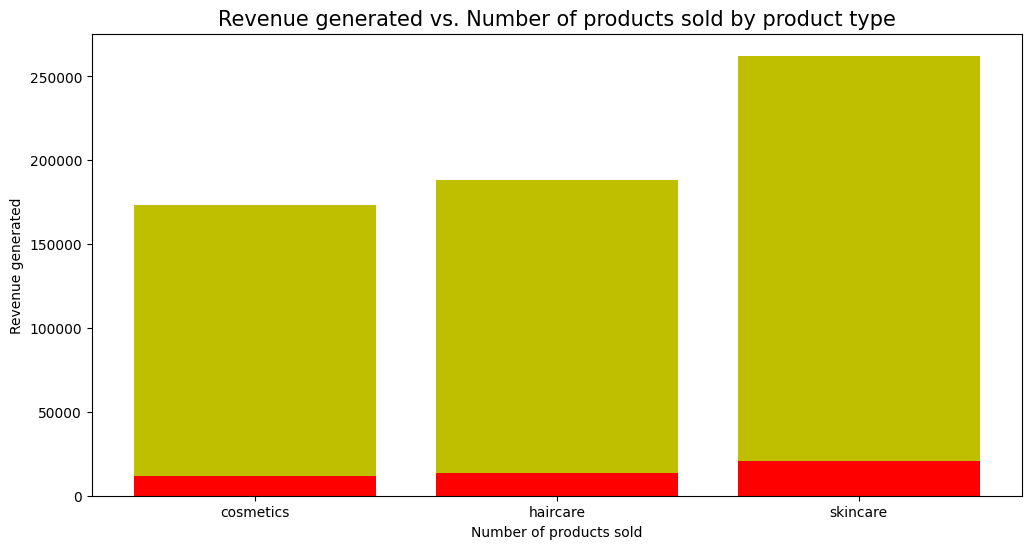

In [19]:
plt.figure(figsize = (12,6))
plt.bar(x = product_sold['Product type'], height= product_sold["Number of products sold"], color = 'r')
plt.bar(x = product_sold['Product type'], height = product_sold["Revenue generated"], bottom = product_sold["Number of products sold"],color = 'y')

plt.title("Revenue generated vs. Number of products sold by product type", fontsize = (15))
plt.xlabel("Number of products sold")
plt.ylabel("Revenue generated")
plt.show()

So, the highest number of products sold of the three product categories is skincare, which means 45% of business comes from skincare, 29% from haircare, and 25% from cosmetics.

And most of the revenue comes from skincare products, followed by haircare, and then cosmetics products.

In [20]:
data['Customer demographics'].unique()

array(['Non-binary', 'Female', 'Unknown', 'Male'], dtype=object)

In [21]:
demographics = data.groupby(['Customer demographics', 'Product type'])['Number of products sold'].sum().reset_index()

In [22]:
demographics

,Customer demographics,Product type,Number of products sold
0,Female,cosmetics,4012
1,Female,haircare,936
2,Female,skincare,7853
3,Male,cosmetics,2304
4,Male,haircare,2292
5,Male,skincare,2911
6,Non-binary,cosmetics,2607
7,Non-binary,haircare,2820
8,Non-binary,skincare,5153
9,Unknown,cosmetics,2834


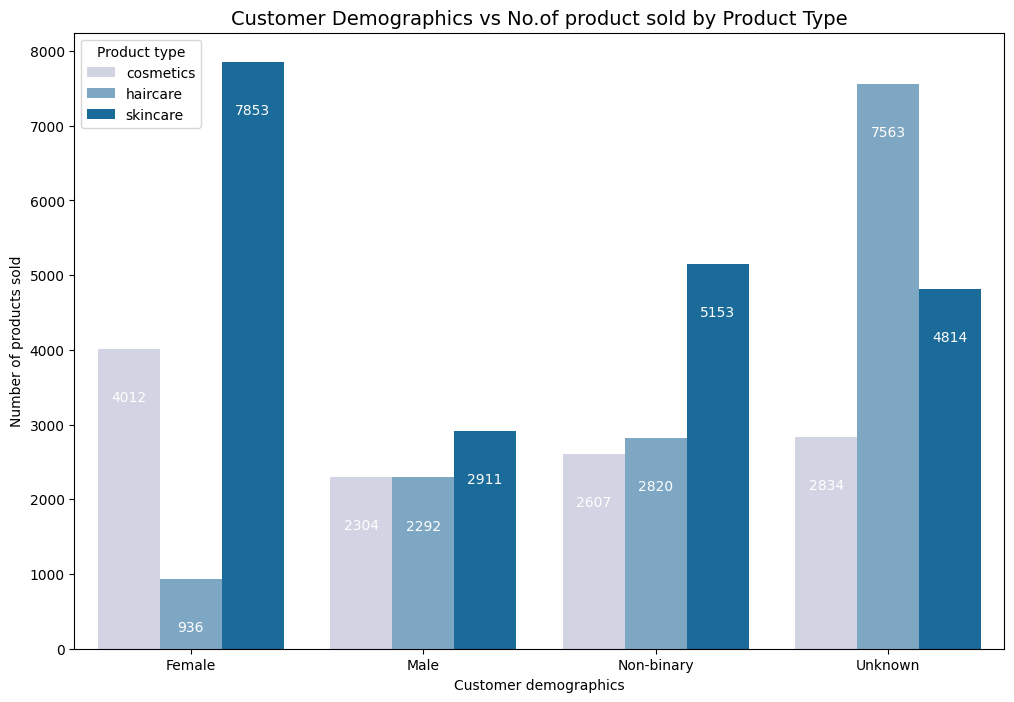

In [23]:
plt.figure(figsize = (12,8))
p = sns.barplot(x = demographics['Customer demographics'], y = demographics['Number of products sold'], hue = demographics['Product type'], palette = 'PuBu')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
plt.title("Customer Demographics vs No.of product sold by Product Type", fontsize = (14))
plt.show()

According to the graph, the female group purchases higher-quality skincare and cosmetic products, whereas the male group purchases products of about equal quality in terms of haircare and cosmetics. And an unknown group category purchases a higher quantity of all three products.


Skin care products are the most popular among all four product categories. Skincare products have a higher demand.

In [24]:
stock = data.groupby(['Product type'])[['Stock levels','Availability']].sum().reset_index()

In [25]:
stock

,Product type,Stock levels,Availability
0,cosmetics,1525,1332
1,haircare,1644,1471
2,skincare,1608,2037


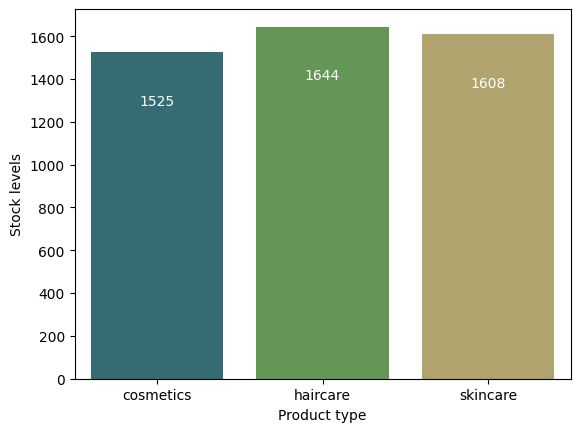

In [26]:
p = sns.barplot(x ='Product type', y =('Stock levels') , data = stock, palette = 'gist_earth')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)

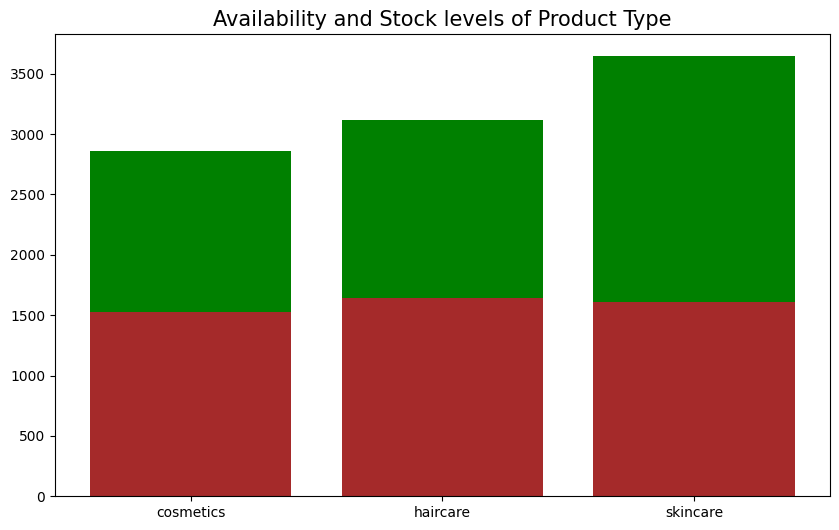

In [27]:
plt.figure(figsize = (10,6))
plt.bar(x ='Product type', height = 'Stock levels' , data = stock, color = 'brown')
plt.bar(x ='Product type', height = 'Availability' , bottom = 'Stock levels' , data = stock, color = 'green')

plt.title("Availability and Stock levels of Product Type", fontsize = (15))
plt.show()

In [28]:
data.groupby(['Product type'])[['Stock levels','Availability']].sum().reset_index()

,Product type,Stock levels,Availability
0,cosmetics,1525,1332
1,haircare,1644,1471
2,skincare,1608,2037


In the graph, green represents the availability and brown represents the stock levels.

So according to the graph, the company holds an equal quantity of inventory of haircare and skincare products and a bit less stock of cosmetic product.

So, skincare products had a higher availability and lower stock level, which means we can quickly manufacture and ship products as needed. On the other hand, cosmetics and haircare have a higher stock level and lower availability, which means the company cannot quickly ship product to the customer because,It took time to manufacture the product.

**--> Operations Analysis**

In [29]:
data.columns

Index(['Product type', 'SKU', 'Price', 'Availability',
       'Number of products sold', 'Revenue generated', 'Customer demographics',
       'Stock levels', 'Lead times', 'Order quantities', 'Shipping times',
       'Shipping carriers', 'Shipping costs', 'Supplier name', 'Location',
       'Lead time', 'Production volumes', 'Manufacturing lead time',
       'Manufacturing costs', 'Inspection results', 'Defect rates',
       'Transportation modes', 'Routes', 'Costs'],
      dtype='object')

In [30]:
product = data.groupby(['Product type'])[['Lead time', 'Order quantities', 'Production volumes']].mean().reset_index()
product['Order quantities'] = product['Order quantities'].round(2)
product['Lead time'] = product['Lead time'].round(2)
product['Production volumes'] = product['Production volumes'].round(2)

In [31]:
product

,Product type,Lead time,Order quantities,Production volumes
0,cosmetics,13.54,51.65,479.27
1,haircare,18.71,43.53,586.97
2,skincare,18.00,52.48,609.15


Skincare products have higher order quantities and a longer lead time. Furthermore, it has a higher production volume (production volume means the amount of products that are produced by the company), which means higher production volumes may require longer lead times to ensure that there is enough time to manufacture the products and meet customer demand.

Haircare products have a longer lead time and higher production volumes. This may be because haircare products require more specialised ingredients or manufacturing processes.

In [32]:
avg_costs = data.groupby(['Manufacturing lead time'])['Manufacturing costs'].mean().reset_index().sort_values(by = 'Manufacturing costs')
avg_costs['Manufacturing costs'] = avg_costs['Manufacturing costs'].round(2)

In [33]:
avg_costs

,Manufacturing lead time,Manufacturing costs
26,27,19.93
27,28,27.28
3,4,27.40
19,20,27.67
5,6,27.80
13,14,29.08
25,26,31.68
21,22,33.81
14,15,34.34
9,10,39.83


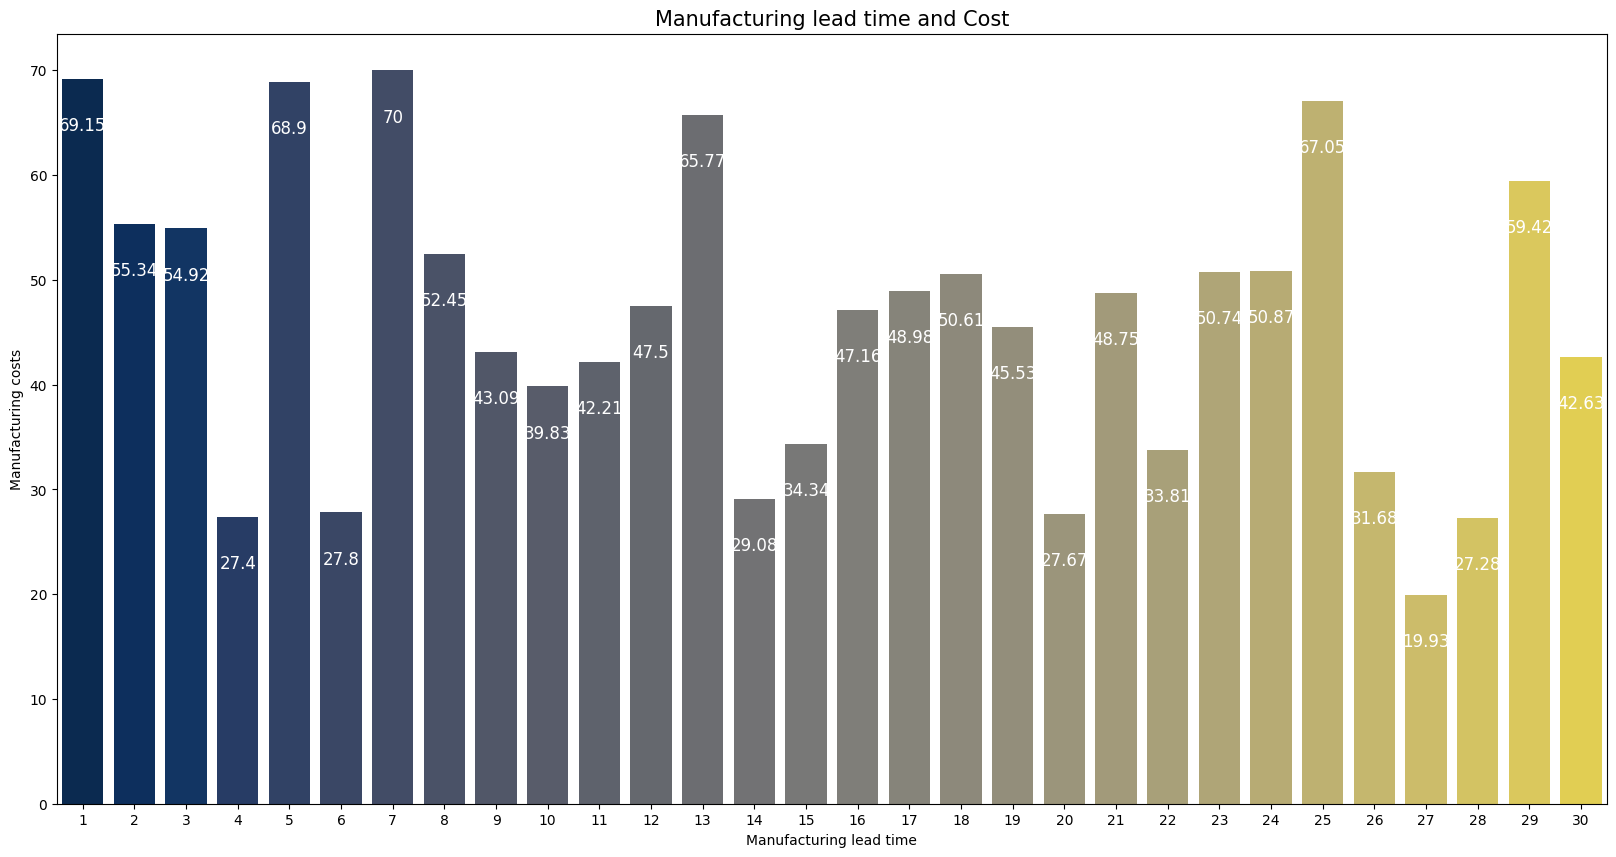

In [34]:
plt.figure(figsize = (20,10))
p = sns.barplot(x= avg_costs['Manufacturing lead time'], y = avg_costs['Manufacturing costs'], palette = 'cividis')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=12)

plt.title('Manufacturing lead time and Cost', fontsize = (15))
plt.show()

In [35]:
rate = data.groupby(['Product type', 'Inspection results'])['Defect rates'].mean().reset_index()
rate['Defect rates'] = rate['Defect rates'].round(2)

In [36]:
rate

,Product type,Inspection results,Defect rates
0,cosmetics,Fail,2.19
1,cosmetics,Pass,1.82
2,cosmetics,Pending,1.71
3,haircare,Fail,2.53
4,haircare,Pass,2.92
5,haircare,Pending,2.27
6,skincare,Fail,2.90
7,skincare,Pass,1.68
8,skincare,Pending,2.33


In [37]:
data['Defect rates'].mean()

2.27715799273961

In [38]:
data['Defect rates'].max()

4.939255288620948

In [39]:
data['Defect rates'].min()

0.0186075676310149

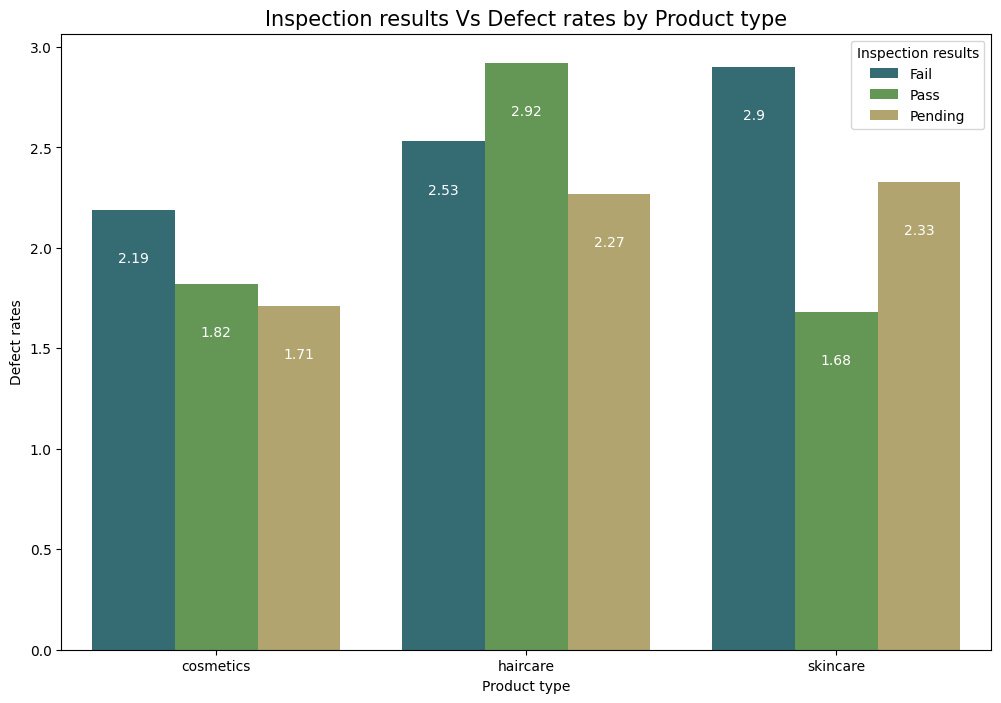

In [40]:
plt.figure(figsize = (12,8))
p = sns.barplot(x = rate['Product type'], y = rate['Defect rates'], hue = rate['Inspection results'], palette = 'gist_earth')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)

plt.title("Inspection results Vs Defect rates by Product type", fontsize = (15))
plt.show()

All product categories have a higher defect rate.

**--> Shipping Analysis**

In [41]:
shipping = data.groupby(['Shipping carriers'])['Shipping costs'].sum().reset_index()

In [42]:
shipping

,Shipping carriers,Shipping costs
0,Carrier A,155.537831
1,Carrier B,236.897620
2,Carrier C,162.379457


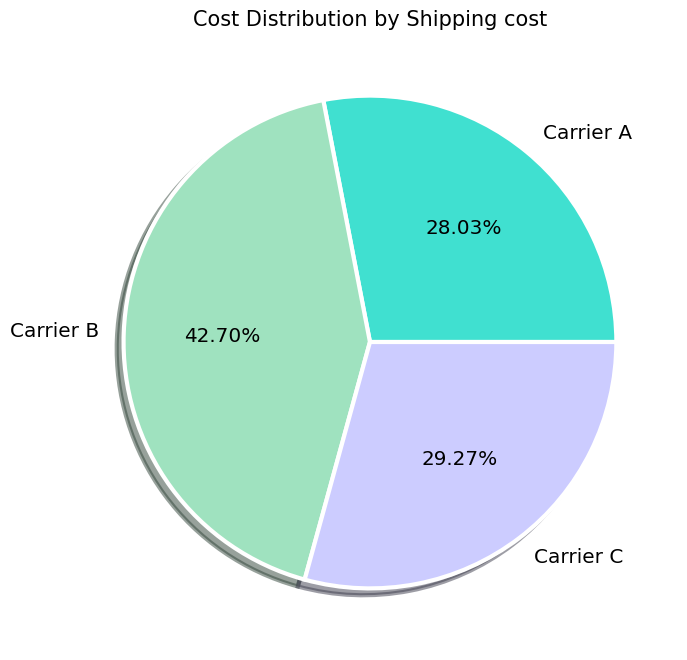

In [43]:
plt.figure(figsize = (12,8))
colors = ['#40E0D0', '#9FE2BF','#CCCCFF']
plt.pie( shipping['Shipping costs'], labels = shipping['Shipping carriers'],autopct = '%.2f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
       textprops={'size': 'x-large'}, shadow =True, colors = colors)
plt.title('Cost Distribution by Shipping cost', fontsize = (15))
plt.show()

In [44]:
carrier_revenue = data.groupby(['Shipping carriers'])['Revenue generated'].sum().reset_index()
carrier_revenue['Revenue generated'] = carrier_revenue['Revenue generated'].round(2)

In [45]:
carrier_revenue

,Shipping carriers,Revenue generated
0,Carrier A,142630.04
1,Carrier B,250094.64
2,Carrier C,184880.18


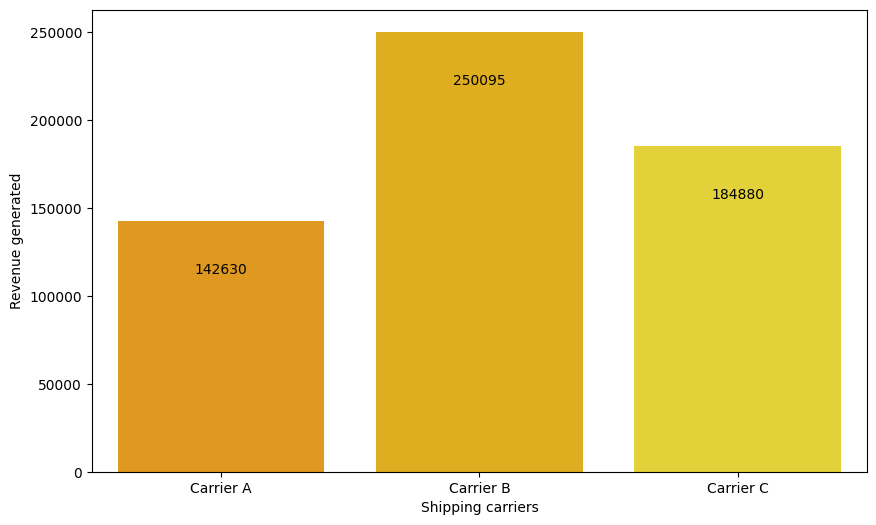

In [46]:
plt.figure(figsize = (10,6))
p = sns.barplot(x = carrier_revenue['Shipping carriers'], y = carrier_revenue['Revenue generated'], palette = 'Wistia_r')
for container in p.containers:
    p.bar_label(container,padding=-40, color='black', fontsize=10)

plt.show()

Both the graphs clearly show shipping carrier B is costly as well as generating higher revenue.

In [47]:
transport = data.groupby(['Transportation modes', 'Routes'])['Costs'].sum().reset_index()

In [48]:
transport

,Transportation modes,Routes,Costs
0,Air,Route A,5800.887460
1,Air,Route B,4464.858025
2,Air,Route C,4338.782012
3,Rail,Route A,6790.710511
4,Rail,Route B,7007.410741
5,Rail,Route C,1370.810306
6,Road,Route A,5934.412107
7,Road,Route B,7181.085147
8,Road,Route C,2932.696386
9,Sea,Route A,2349.764416


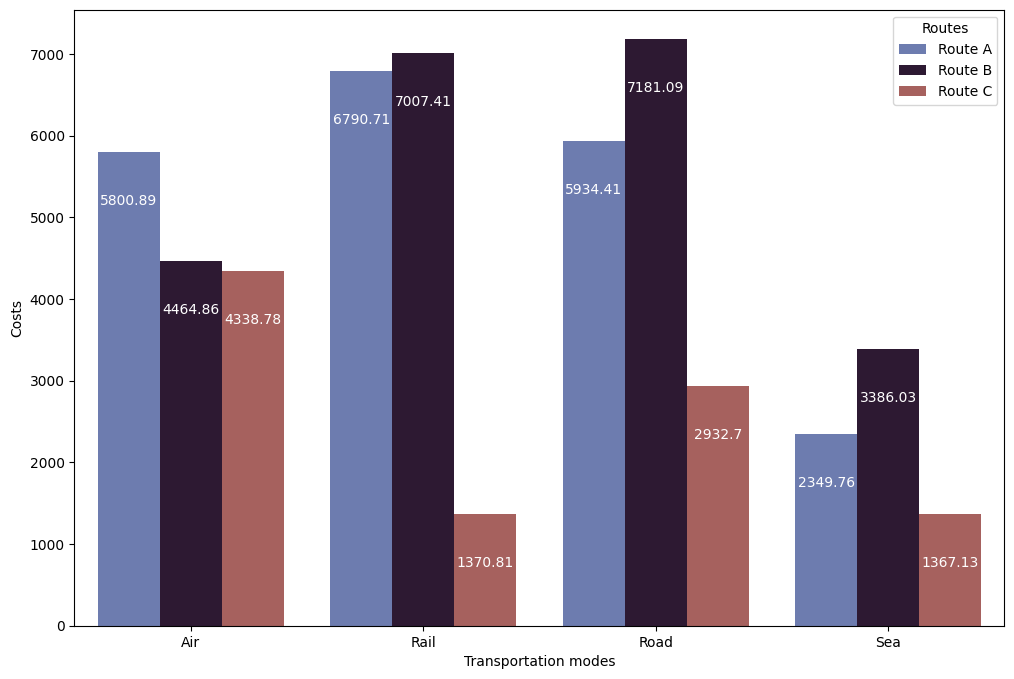

In [49]:
plt.figure(figsize = (12,8))
p = sns.barplot(x = transport['Transportation modes'], y = transport['Costs'], hue = transport['Routes'], palette = 'twilight')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
plt.show()

In [50]:
shipping = data.groupby(['Shipping carriers', 'Transportation modes'])['Shipping times'].mean().reset_index()
shipping['Shipping times'] = shipping['Shipping times'].round(2)

In [51]:
shipping

,Shipping carriers,Transportation modes,Shipping times
0,Carrier A,Air,5.60
1,Carrier A,Rail,7.43
2,Carrier A,Road,5.18
3,Carrier A,Sea,7.00
4,Carrier B,Air,4.21
5,Carrier B,Rail,6.33
6,Carrier B,Road,4.91
7,Carrier B,Sea,6.67
8,Carrier C,Air,6.57
9,Carrier C,Rail,6.17


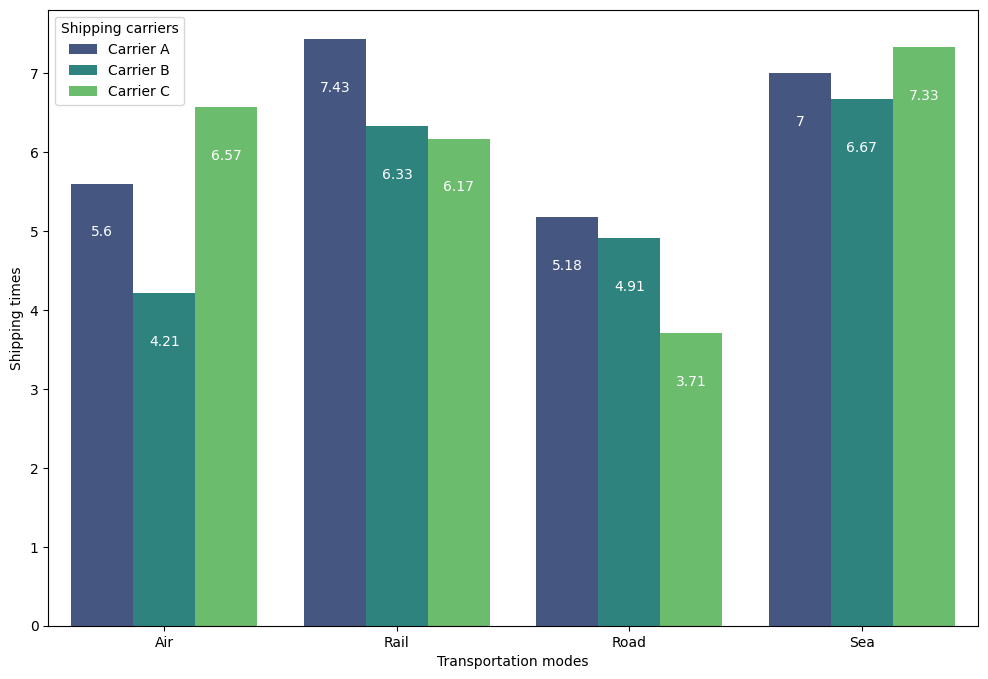

In [52]:
plt.figure(figsize = (12,8))
p = sns.barplot(x = shipping['Transportation modes'], y = shipping['Shipping times'], hue = shipping['Shipping carriers'], palette = 'viridis')
for container in p.containers:
    p.bar_label(container,padding=-40, color='white', fontsize=10)
plt.show()

According to the graph, the fastest and most efficient shipping option is Carrier B in all four transportation modes.